In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re

In [24]:
def get_max_angle_train_data(filename):
    train_data = pd.read_csv(filename, header=None)
    max_angle = train_data.iloc[:, 1:].max(axis=1)
    # # replace nan with 0
    # max_angle = max_angle.fillna(0)
    return max_angle

In [25]:
# get data
train_data_files = glob.glob(os.path.join("../data/train_thetas/", "*.csv"))
train_data_files.sort(key=lambda f: int(re.sub('\D', '', f)))
train_data = [get_max_angle_train_data(f) for f in train_data_files]# shape 15000 * (1600)

target_train_files = glob.glob(os.path.join("../data/training_ground_truth_files", "*_ground"))
target_train_files.sort(key=lambda f: int(re.sub('\D', '', f)))
target_train = [pd.read_csv(f, header=None, sep=' ', dtype="int8").to_numpy().flatten(order='F') for f in target_train_files] # shape 15000 * (40, 40)


In [26]:
first_file = pd.read_csv(train_data_files[0], header=None)
first_file.head()

,0,1,2,3,4,5,6,7,8,9,10
0,3,0.004409,0.002461,0.001207,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
1,2,0.009575,0.003809,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
2,5,0.007918,0.005725,0.005614,0.005240,0.003752,0.00000,0.0,0.0,0.0,0.0
3,5,0.005603,0.003863,0.003765,0.002105,0.002085,0.00000,0.0,0.0,0.0,0.0
4,6,0.006240,0.005391,0.004977,0.003180,0.003062,0.00064,0.0,0.0,0.0,0.0


0       3
1       2
2       5
3       5
4       6
       ..
1595    9
1596    4
1597    2
1598    3
1599    3
Name: 0, Length: 1600, dtype: int64


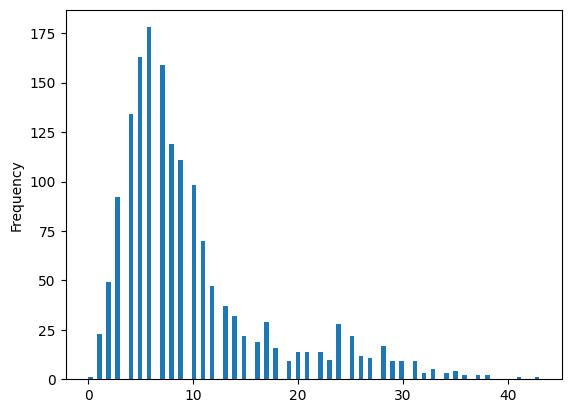

In [27]:
# plot first column histogram
first_column = first_file[0]
print(first_column)

first_column.plot.hist(bins=100)
plt.show()

In [28]:
# add a column to first_file named 'max_angle' equal to sum of all but first columns divided by first column

first_file['max_angle'] = first_file.iloc[:, 1:].max(axis=1)

max_angle = first_file['max_angle']

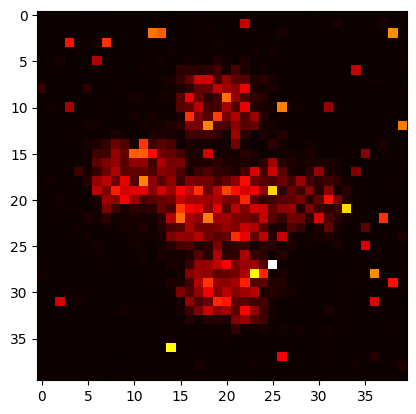

In [29]:
# reshape max_angle to 40x40
max_angle = max_angle.values.reshape(40, 40)

# plot max_angle as a heatmap
plt.imshow(max_angle, cmap='hot', interpolation='nearest')
plt.show()

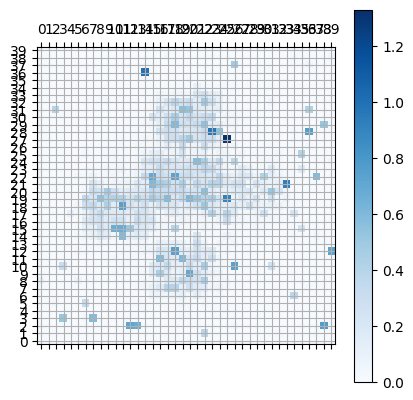

In [30]:
plt.matshow(max_angle, cmap=plt.cm.Blues, origin='lower')
plt.colorbar()

ax = plt.gca();
ax.set_xticks(np.arange(0, 40, 1));
ax.set_yticks(np.arange(0, 40, 1));

plt.grid()
plt.show()

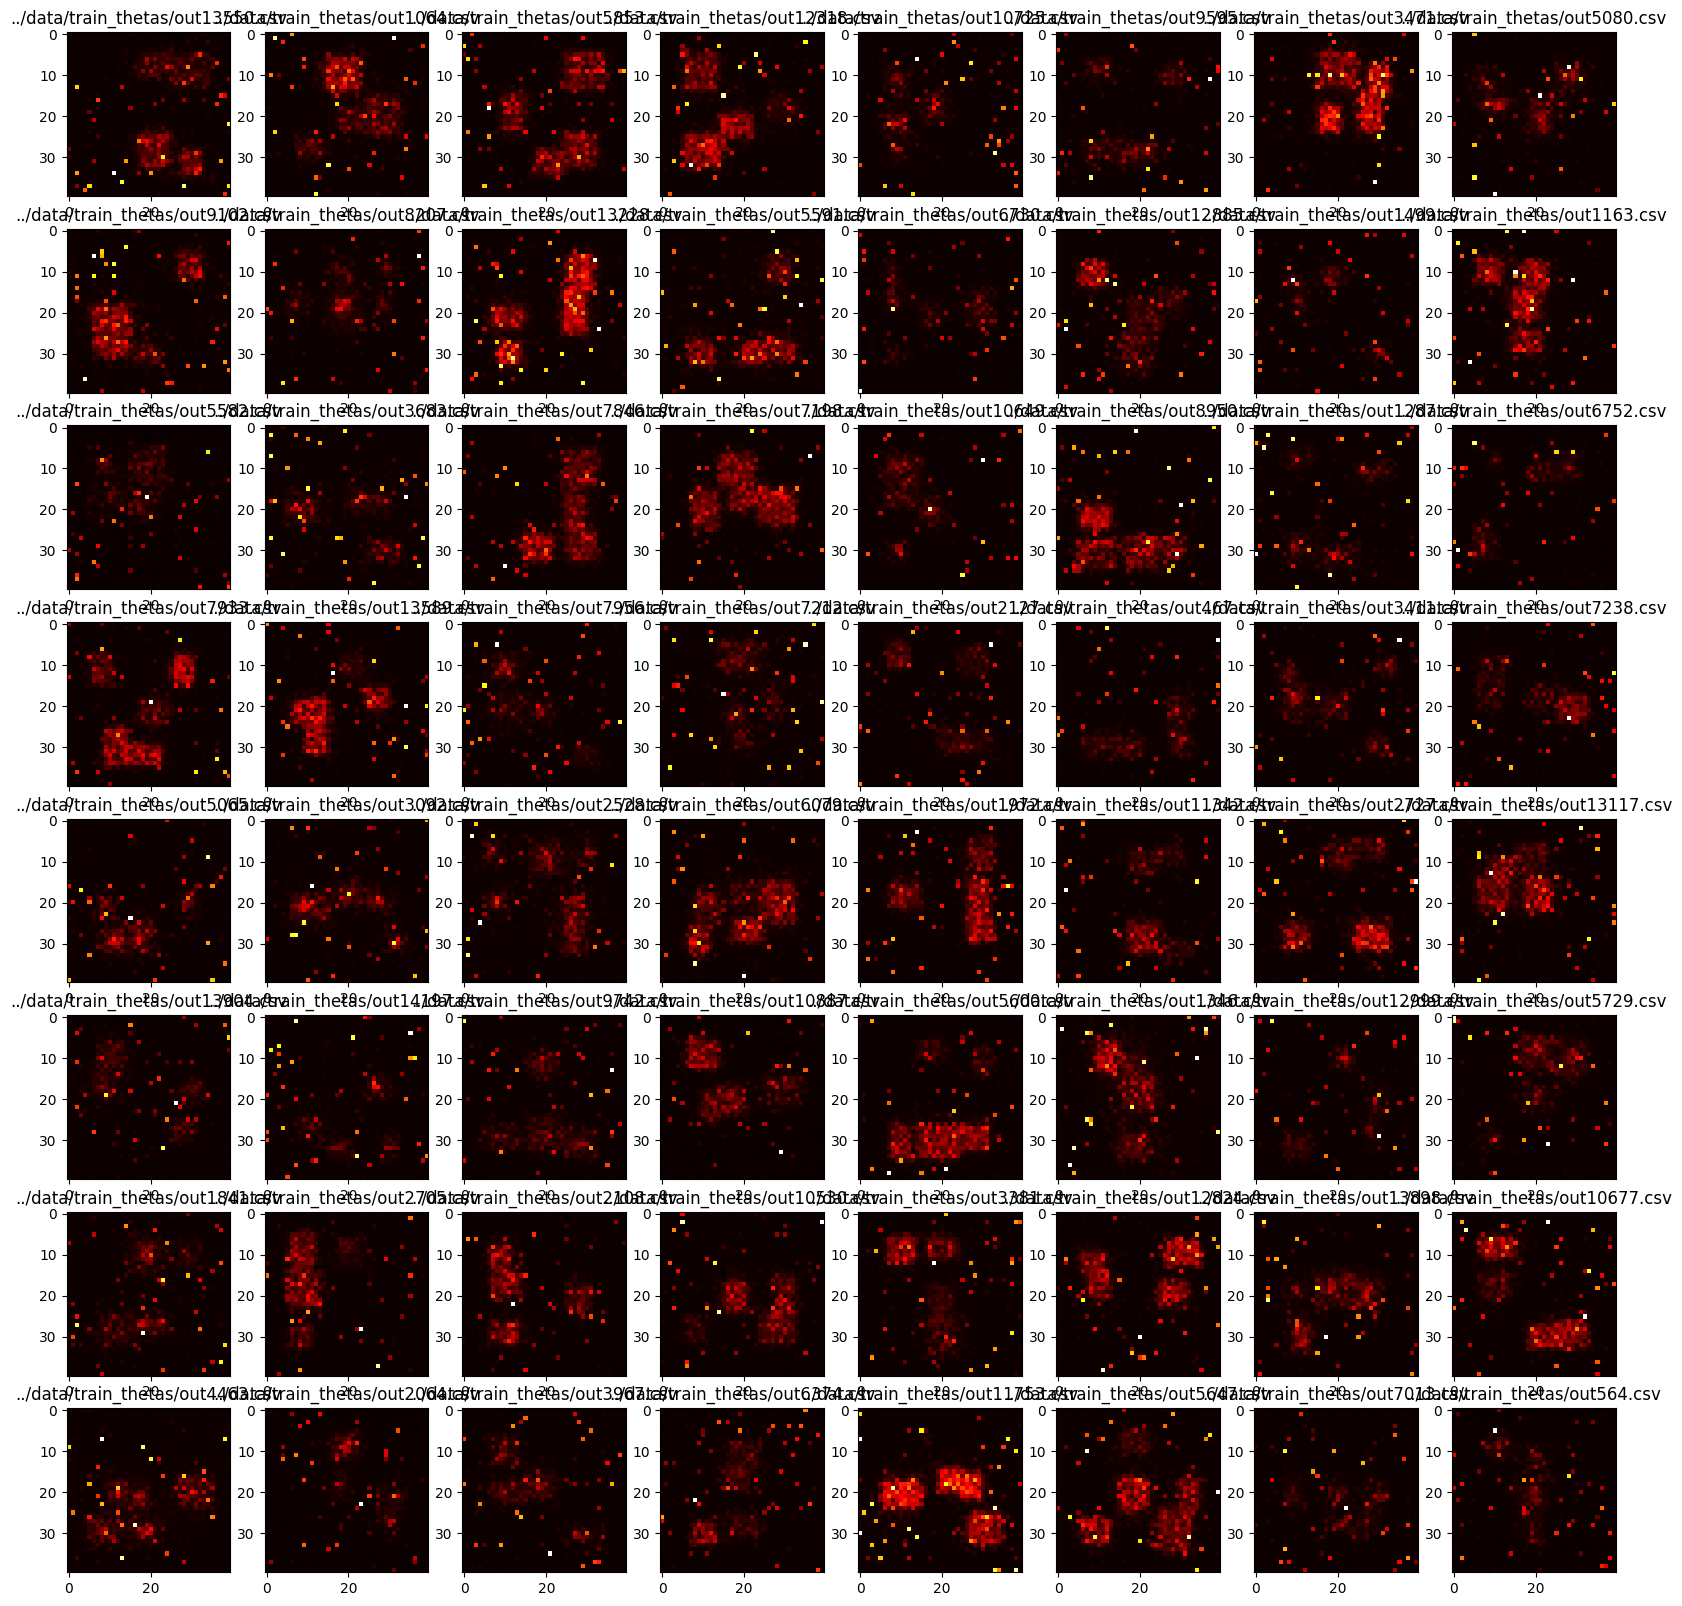

In [31]:
# visualise heatmaps of max_angle from 64 random files in a grid

# create a list of 64 random files
random_files = np.random.choice(train_data_files, 64)

# create a list of 64 max_angles
max_angles = []

for file in random_files:
    df = pd.read_csv(file, header=None)
    df['max_angle'] = df.iloc[:, 1:].max(axis=1)
    max_angle = df['max_angle']
    max_angle = max_angle.values.reshape(40, 40)
    max_angles.append(max_angle)

# plot max_angles as a grid of heatmaps
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(max_angles[i], cmap='hot', interpolation='nearest')
    ax.set_title(random_files[i])
    
plt.show()



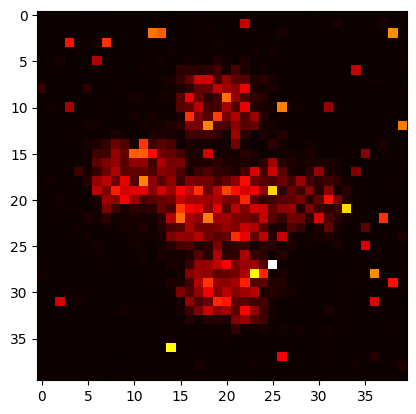

In [32]:
# add a column to first_file named 'max_angle' equal to max of 1 to 11 column

first_file['max_angle'] = first_file.iloc[:, 1:11].max(axis=1)

max_angle = first_file['max_angle']

# reshape max_angle to 40x40
max_angle = max_angle.values.reshape(40, 40)

# plot max_angle as a heatmap
plt.imshow(max_angle, cmap='hot', interpolation='nearest')
plt.show()

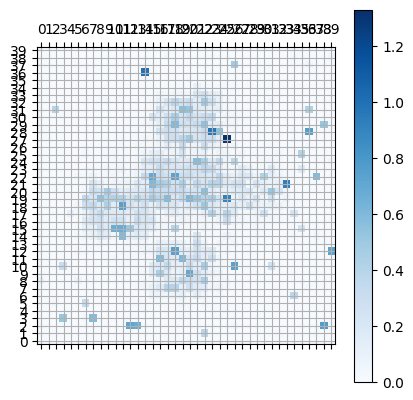

In [33]:
plt.matshow(max_angle, cmap=plt.cm.Blues, origin='lower')
plt.colorbar()

ax = plt.gca();
ax.set_xticks(np.arange(0, 40, 1));
ax.set_yticks(np.arange(0, 40, 1));

plt.grid()
plt.show()

In [34]:
# plot average angle of each class as a bar chart

classes = {}

for file_idx in range(len(train_data)):
    train_grid = train_data[file_idx]
    target_grid = target_train[file_idx]

    for grid_idx in range(len(train_grid)):
        angle = train_grid[grid_idx]
        target = target_grid[grid_idx]
        
        if np.isnan(angle):
            continue

        if target not in classes:
            classes[target] = [angle]
        else:
            classes[target].append(angle)

for key in classes:
    classes[key] = np.mean(classes[key])

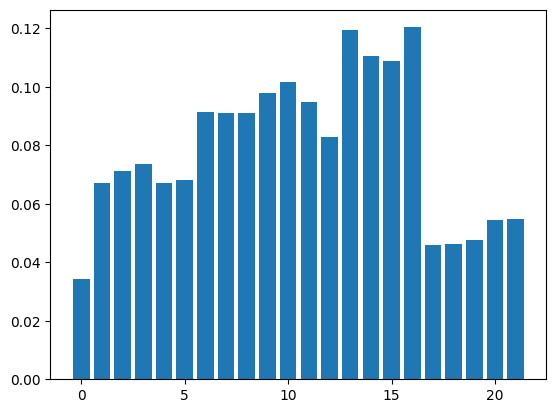

In [35]:
plt.bar(classes.keys(), classes.values())
plt.show()

In [36]:
# map target_train using classes dictionary
maxs_target_train = np.zeros((len(target_train), len(target_train[0])))

for file_idx in range(len(target_train)):
    target_grid = target_train[file_idx]

    for grid_idx in range(len(target_grid)):
        target = target_grid[grid_idx]
        maxs_target_train[file_idx][grid_idx] = classes[target]



In [37]:
print(maxs_target_train[0][0:10])

[0.03434591 0.03434591 0.03434591 0.03434591 0.03434591 0.03434591
 0.03434591 0.03434591 0.03434591 0.03434591]


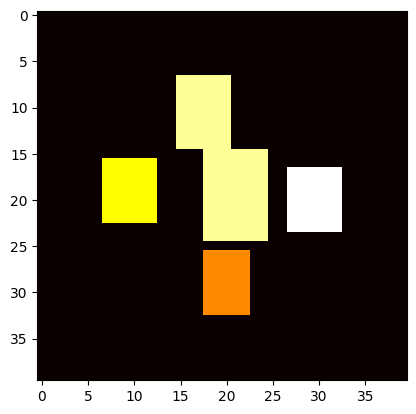

In [38]:
# reshape max_targets_0 to 40x40
max_targets_0 = maxs_target_train[0].reshape(40, 40)

# plot max_angle as a heatmap
plt.imshow(max_targets_0, cmap='hot', interpolation='nearest')
plt.show()

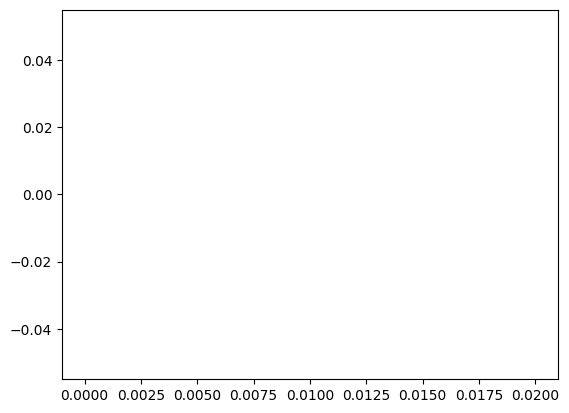

In [39]:
# make histogram of max_targets_0
plt.hist(max_targets_0.flatten(), bins=100, range=(0, 0.02))
plt.show()

In [40]:
# print value counts of max_targets_0
print(pd.Series(max_targets_0.flatten()).value_counts())

0.034346    1363
0.110634     118
0.098002      42
0.119375      42
0.082902      35
dtype: int64


In [41]:
# print value counts of target_train
print(pd.Series(np.array(target_train).flatten()).value_counts())

0     21343461
18      257572
19      252841
17      245083
21      242929
20      242900
13       99313
15       98718
14       95843
16       95759
7        94372
8        92507
10       92093
9        90844
4        86564
12       84125
6        83331
5        82025
11       81152
2        80804
3        79498
1        78266
dtype: int64


In [42]:
test = [pd.read_csv(f, header=None, sep=' ', dtype="int8").to_numpy().flatten(order='F') for f in target_train_files[0:10]]

In [43]:
# print value counts of test
print(pd.Series(np.array(test).flatten()).value_counts())

0     14252
9       248
17      218
14      163
18      161
21      156
15      154
20      149
19      129
13       93
8        93
5        65
11       42
12       35
6        30
10        7
7         5
dtype: int64


In [44]:
print(target_train[1])

[0 0 0 ... 0 0 0]
